In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import os, sys
import random

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn.functional as F

c:\Users\Admin\anaconda3\envs\mlasm2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [3]:
main = pd.read_csv('data_labels_mainData.csv')
extra = pd.read_csv('data_labels_extraData.csv')
data_merged = pd.concat([main, extra], axis=0)
data_merged

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0.0,0
1,22406,1,22406.png,fibroblast,0.0,0
2,22407,1,22407.png,fibroblast,0.0,0
3,22408,1,22408.png,fibroblast,0.0,0
4,22409,1,22409.png,fibroblast,0.0,0
...,...,...,...,...,...,...
10379,20028,99,20028.png,NaN,NaN,0
10380,20029,99,20029.png,NaN,NaN,0
10381,20030,99,20030.png,NaN,NaN,0
10382,20031,99,20031.png,NaN,NaN,0


In [4]:
LEARNING_RATE = 1e-4
TRAIN_BATCH_SIZE = 64
VAL_BATCH_SIZE = 64
NUM_WORKERS = 4
EPOCHS = 10
NUM_CLASSES = len(data_merged['isCancerous'].unique())
IN_CHANNELS = 3
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


In [5]:
train_imgs, val_imgs = train_test_split(data_merged, test_size=0.2)

# VGG8

In [6]:
from utils.MyDataset import MyDataset

train_dataset = MyDataset(train_imgs, 'isCancerous')
val_dataset = MyDataset(val_imgs, 'isCancerous')

train_loader = DataLoader(
    dataset = train_dataset,
    num_workers = NUM_WORKERS,
    batch_size = TRAIN_BATCH_SIZE,
    shuffle = True
)

val_loader = DataLoader(
    dataset = val_dataset,
    num_workers = NUM_WORKERS,
    batch_size = VAL_BATCH_SIZE,
    shuffle = True
)

In [7]:
from utils.trainer import train, val
from models.VGG import vgg8_bn

vgg8_bn = vgg8_bn(num_classes=NUM_CLASSES, in_channels=IN_CHANNELS)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg8_bn.parameters(), lr=LEARNING_RATE)

# Logs - Helpful for plotting after training finishes
train_logs = {'loss' : [], 'accuracy' : [], 'epoch' : []}
val_logs = {'loss' : [], 'accuracy' : [], 'epoch' : []}
best_val_acc = 0.0

for epoch in range(1, EPOCHS + 1):
    print(f"Epoch {epoch}:")
    train_loss, train_acc = train(vgg8_bn, train_loader, optimizer, loss_fn, NUM_CLASSES)
    train_logs['loss'].append(train_loss)
    train_logs['accuracy'].append(train_acc)
    train_logs['epoch'].append(epoch)
    
    val_loss, val_acc, best_val_acc = val(vgg8_bn, val_loader, loss_fn, NUM_CLASSES, best_val_acc, 'vgg8_bn_test1')
    val_logs['loss'].append(val_loss)
    val_logs['accuracy'].append(val_acc)
    val_logs['epoch'].append(epoch)

Epoch 1:


Val: 100%|██████████| 64/64 [00:21<00:00,  3.01batch/s, loss: 0.464892, accuracy: 89.053253% [3612/4056]]


New best validation accuracy: 89.053253, add to d:\RMIT\MachineLearning\Asm\Asm2\Image_classification_data/model_saved/vgg8_bn_test1_best.pth
Epoch 2:


Val: 100%|██████████| 64/64 [00:16<00:00,  3.83batch/s, loss: 0.111238, accuracy: 90.261345% [3661/4056]]


New best validation accuracy: 90.261345, add to d:\RMIT\MachineLearning\Asm\Asm2\Image_classification_data/model_saved/vgg8_bn_test1_best.pth
Epoch 3:


Val: 100%|██████████| 64/64 [00:17<00:00,  3.64batch/s, loss: 0.472127, accuracy: 90.729782% [3680/4056]]


New best validation accuracy: 90.729782, add to d:\RMIT\MachineLearning\Asm\Asm2\Image_classification_data/model_saved/vgg8_bn_test1_best.pth
Epoch 4:


Val: 100%|██████████| 64/64 [00:16<00:00,  3.90batch/s, loss: 0.154472, accuracy: 89.349113% [3624/4056]]


Epoch 5:


Val: 100%|██████████| 64/64 [00:17<00:00,  3.56batch/s, loss: 0.059251, accuracy: 91.444771% [3709/4056]]


New best validation accuracy: 91.444771, add to d:\RMIT\MachineLearning\Asm\Asm2\Image_classification_data/model_saved/vgg8_bn_test1_best.pth
Epoch 6:


Val: 100%|██████████| 64/64 [00:17<00:00,  3.63batch/s, loss: 0.326340, accuracy: 89.102562% [3614/4056]]


Epoch 7:


Val: 100%|██████████| 64/64 [00:17<00:00,  3.56batch/s, loss: 0.775579, accuracy: 90.581856% [3674/4056]]


Epoch 8:


Val: 100%|██████████| 64/64 [00:19<00:00,  3.36batch/s, loss: 0.202236, accuracy: 90.705132% [3679/4056]]


Epoch 9:


Val: 100%|██████████| 64/64 [00:18<00:00,  3.52batch/s, loss: 0.031323, accuracy: 89.990135% [3650/4056]]


Epoch 10:


Val: 100%|██████████| 64/64 [00:17<00:00,  3.63batch/s, loss: 0.135833, accuracy: 89.521698% [3631/4056]]


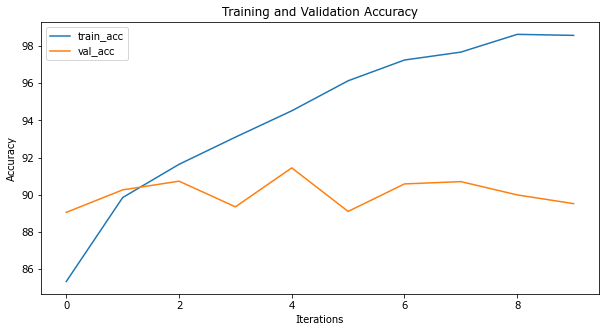

In [8]:
from utils.visualizer import visualize_accuracy, visualize_loss

visualize_accuracy(train_logs['accuracy'], val_logs['accuracy'])

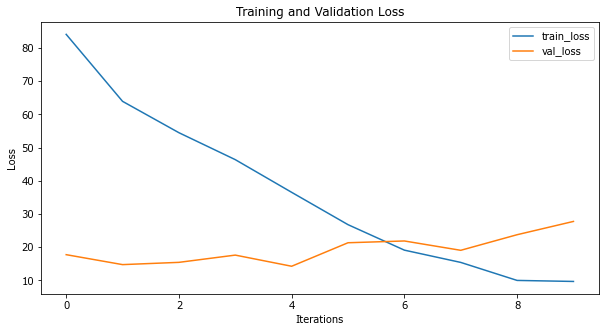

In [9]:
visualize_loss(train_logs['loss'], val_logs['loss'])

# VGG16

In [8]:
from utils.MyDataset import MyDataset

train_dataset = MyDataset(train_imgs, 'isCancerous')
val_dataset = MyDataset(val_imgs, 'isCancerous')

train_loader = DataLoader(
    dataset = train_dataset,
    num_workers = NUM_WORKERS,
    batch_size = TRAIN_BATCH_SIZE,
    shuffle = True
)

val_loader = DataLoader(
    dataset = val_dataset,
    num_workers = NUM_WORKERS,
    batch_size = VAL_BATCH_SIZE,
    shuffle = True
)

In [9]:
from utils.trainer import train, val
from models.VGG import vgg16_bn

vgg16_bn = vgg16_bn(num_classes=NUM_CLASSES, in_channels=IN_CHANNELS)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg16_bn.parameters(), lr=LEARNING_RATE)

# Logs - Helpful for plotting after training finishes
train_logs = {'loss' : [], 'accuracy' : [], 'epoch' : []}
val_logs = {'loss' : [], 'accuracy' : [], 'epoch' : []}
best_val_acc = 0.0
prev_best_val_acc = 0.0
EARLY_STOPPING = 3
unchange_val_acc_count = 0

for epoch in range(1, EPOCHS + 1):
    print(f"Epoch {epoch}:")
    train_loss, train_acc = train(vgg16_bn, train_loader, optimizer, loss_fn, NUM_CLASSES)
    train_logs['loss'].append(train_loss)
    train_logs['accuracy'].append(train_acc)
    train_logs['epoch'].append(epoch)
    
    prev_best_val_acc = best_val_acc
    val_loss, val_acc, best_val_acc = val(vgg16_bn, val_loader, loss_fn, NUM_CLASSES, best_val_acc, 'vgg16_bn_test1')
    val_logs['loss'].append(val_loss)
    val_logs['accuracy'].append(val_acc)
    val_logs['epoch'].append(epoch)
    
    if prev_best_val_acc == best_val_acc:
        unchange_val_acc_count += 1
    else:
        unchange_val_acc_count = 0
        
    if unchange_val_acc_count == EARLY_STOPPING:
        break
            

Epoch 1:


Val: 100%|██████████| 64/64 [00:33<00:00,  1.88batch/s, loss: 0.166429, accuracy: 90.088760% [3654/4056]]


New best validation accuracy: 90.088760, add to d:\RMIT\MachineLearning\Asm\Asm2\Image_classification_data/model_saved/vgg16_bn_test1_best.pth
Epoch 2:


Val: 100%|██████████| 64/64 [00:54<00:00,  1.18batch/s, loss: 0.152613, accuracy: 91.494080% [3711/4056]]


New best validation accuracy: 91.494080, add to d:\RMIT\MachineLearning\Asm\Asm2\Image_classification_data/model_saved/vgg16_bn_test1_best.pth
Epoch 3:


Val: 100%|██████████| 64/64 [00:31<00:00,  2.01batch/s, loss: 0.156948, accuracy: 90.433922% [3668/4056]]


Epoch 4:


Val: 100%|██████████| 64/64 [01:04<00:00,  1.01s/batch, loss: 0.369583, accuracy: 90.532547% [3672/4056]]


Epoch 5:


Val: 100%|██████████| 64/64 [01:11<00:00,  1.11s/batch, loss: 0.583809, accuracy: 90.927025% [3688/4056]]


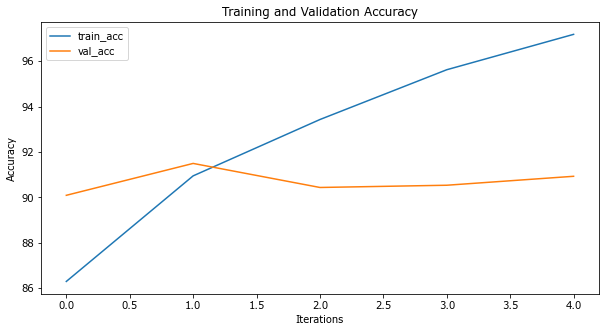

In [10]:
from utils.visualizer import visualize_accuracy, visualize_loss

visualize_accuracy(train_logs['accuracy'], val_logs['accuracy'])

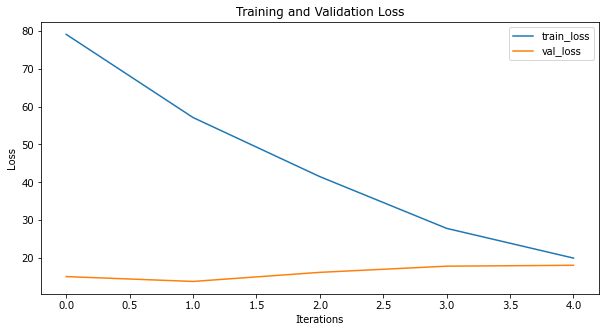

In [11]:
visualize_loss(train_logs['loss'], val_logs['loss'])

# Evaluation

In [15]:
import os
from models.VGG import vgg8_bn, vgg16_bn
filepath = os.getcwd() + '/model_saved/'
model = None
saved = None
best_val_acc = 0
vgg16_bn_best_val_acc = torch.load(filepath + 'vgg16_bn_test1_best.pth')['best_val_acc']
vgg8_bn_best_val_acc = torch.load(filepath + 'vgg8_bn_test1_best.pth')['best_val_acc']

if vgg16_bn_best_val_acc > vgg8_bn_best_val_acc:
    model = vgg16_bn(num_classes=NUM_CLASSES, in_channels=IN_CHANNELS)
    model.load_state_dict(torch.load(filepath + 'vgg16_bn_test1_best.pth')['model_state_dict'])
    best_val_acc = vgg16_bn_best_val_acc
    print('VGG16 better than VGG8')
else:
    model = vgg8_bn(num_classes=NUM_CLASSES, in_channels=IN_CHANNELS)  
    model.load_state_dict(torch.load(filepath + 'vgg8_bn_test1_best.pth')['model_state_dict'])
    best_val_acc = vgg8_bn_best_val_acc
    print('VGG8 better than VGG16')

VGG16 better than VGG8
